# Decision tree on Titanic Data set

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df=pd.read_csv("./Downloads/titanic/train.csv")
titanic_df
#titanic_df.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#  Exploratory Data Analysis 

In [3]:
titanic_df.info()
titanic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


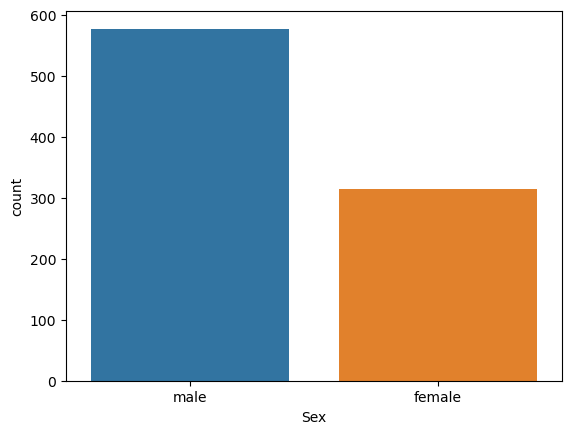

In [4]:
sns.countplot(x='Sex',data=titanic_df)
plt.show()

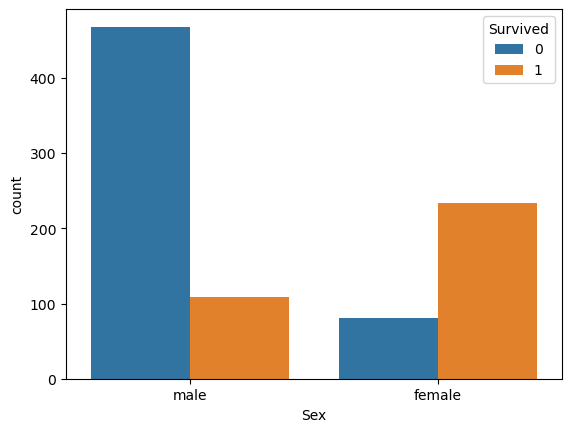

In [5]:
sns.countplot(x='Sex',data=titanic_df,hue='Survived')
plt.show()

C:\Users\keerthana.r\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


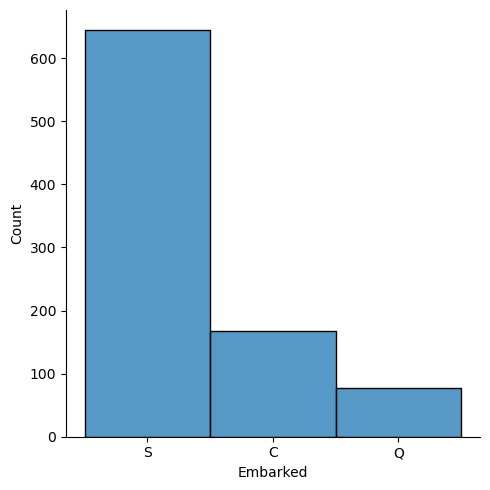

In [6]:
sns.displot(titanic_df['Embarked'],kde=False,bins=20)
plt.show()

# Data Preparation

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
"""
After exploring and analyzing the data, we discovered that certain features do not impact the output, so we can ignore them.
Therefore, the Name, PassengerId, Ticket, Cabin, and Embarked features need to be removed from the DataFrame.
"""

titanic_df = titanic_df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])

In [9]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
# Sex table values are not numeric, so we are going to convert to numberic by assigning '1' to 'male' and '0' to 'female'
# we are using numpy function np.where on the Sex column

titanic_df['Sex'] = np.where(titanic_df['Sex'] == 'male',1,0)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


<Axes: >

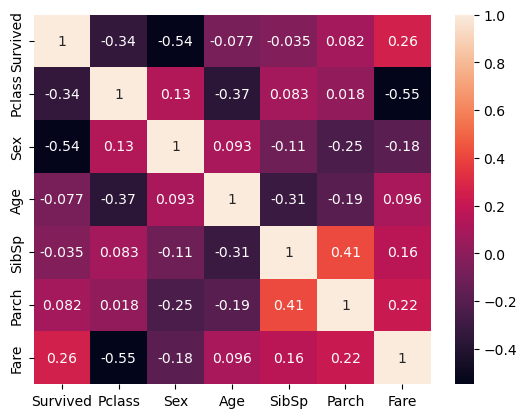

In [11]:
# Visualize the correlation between variables in a dataset.

"""
note 1 :
Retain features with high correlation with the target (survived).
Remove features that are highly correlated with each other to avoid multicollinearity.
Example:
If two features, X1 and X2, are highly correlated (e.g., 0.95), one can be removed as they carry redundant information.

note 2 :
In data analysis, negative correlation indicates that as one variable increases, the other variable tends to decrease, and vice versa.
Example :
If the passenger class (PClass) increases (e.g., from 1st to 3rd class), the likelihood of survival (Survived) decreases.
"""

sns.heatmap(titanic_df.corr(),annot=True)

#Correlation between survived and Sex is more, hence this feature impact more on the output.





# Handling Missing Values

In [12]:
# to get the number of null/missing values in the data

titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

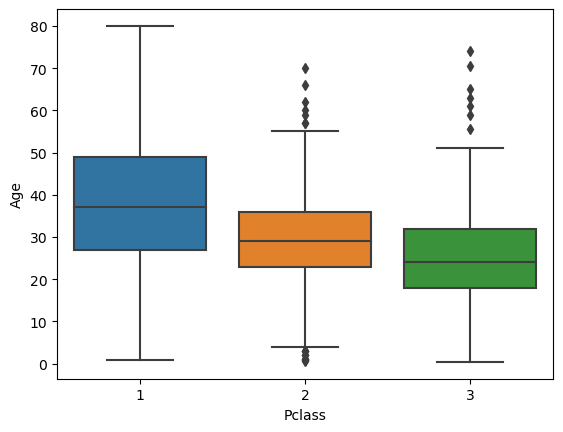

In [13]:
"""
The correlation value of Age with respect to Pclass is 0.37. This is the highest correlation of the Age feature with 
any other feature, which is why we are using Pclass to fill the missing values for Age.
"""


"""
A boxplot (or box-and-whisker plot) is a graphical representation used to summarize the distribution of a dataset. 
It provides a clear visualization of central tendency, spread, and outliers.
"""

sns.boxplot(x='Pclass',y='Age',data=titanic_df)
plt.show()

In [14]:
#From the above boxplot, we can clearly see that the average age in Pclass 1 is 38.2, in Pclass 2 is 30, and in Pclass 3 is 25. 
#We can also calculate these values mathematically as shown below.

print(titanic_df[titanic_df['Pclass']==1]['Age'].mean())
print(titanic_df[titanic_df['Pclass']==2]['Age'].mean())
print(titanic_df[titanic_df['Pclass']==3]['Age'].mean())

#We can use these mean values to fill the 'Age' that have null values.

38.233440860215055
29.87763005780347
25.14061971830986


In [15]:
# Create a function to fill age, if Pclass ==1, then Age == 38.2, Pclass ==2, then Age == 29.87, and if Pclass ==3, then Age == 25.14

def fill_age(row):
    age = row[0]
    pclass = row[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 38.23
        if pclass==2:
            return 29.87
        if pclass==3:
            return 25.14
    else:
        return age    

In [16]:
titanic_df['Age']= titanic_df[['Age','Pclass']].apply(fill_age,axis=1)
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# Model Building 

In [17]:
x = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x.values,y.values, test_size=0.2, random_state=0)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Building model without giving maximum depth value

In [22]:
model1 = DecisionTreeClassifier(criterion='entropy')

In [23]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
y_pred1 = model1.predict(x_test)

In [25]:
model1.score(x_train,y_train)

0.9817415730337079

In [26]:
model1.score(x_test,y_test)

0.7821229050279329

In [27]:
# we can see that training score is 0.98 while testing score is 0.7821.
# This shows that the model is over fit

from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test,y_pred1))

#here we can see that model is overfitted

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



# Building model with maximum depth value

In [28]:
# to avoid overfitting use max_depth

model2 = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [30]:
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [31]:
model2.score(x_train,y_train)

0.8342696629213483

In [32]:
model2.score(x_test,y_test)

0.8212290502793296

In [33]:
# we can see that training score is 0.83 while testing score is 0.82.Hence model is trained well.

# Visualizing The Tree

In [51]:
#from sklearn import tree
from sklearn.tree import plot_tree

In [54]:
features = x.columns.tolist()
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

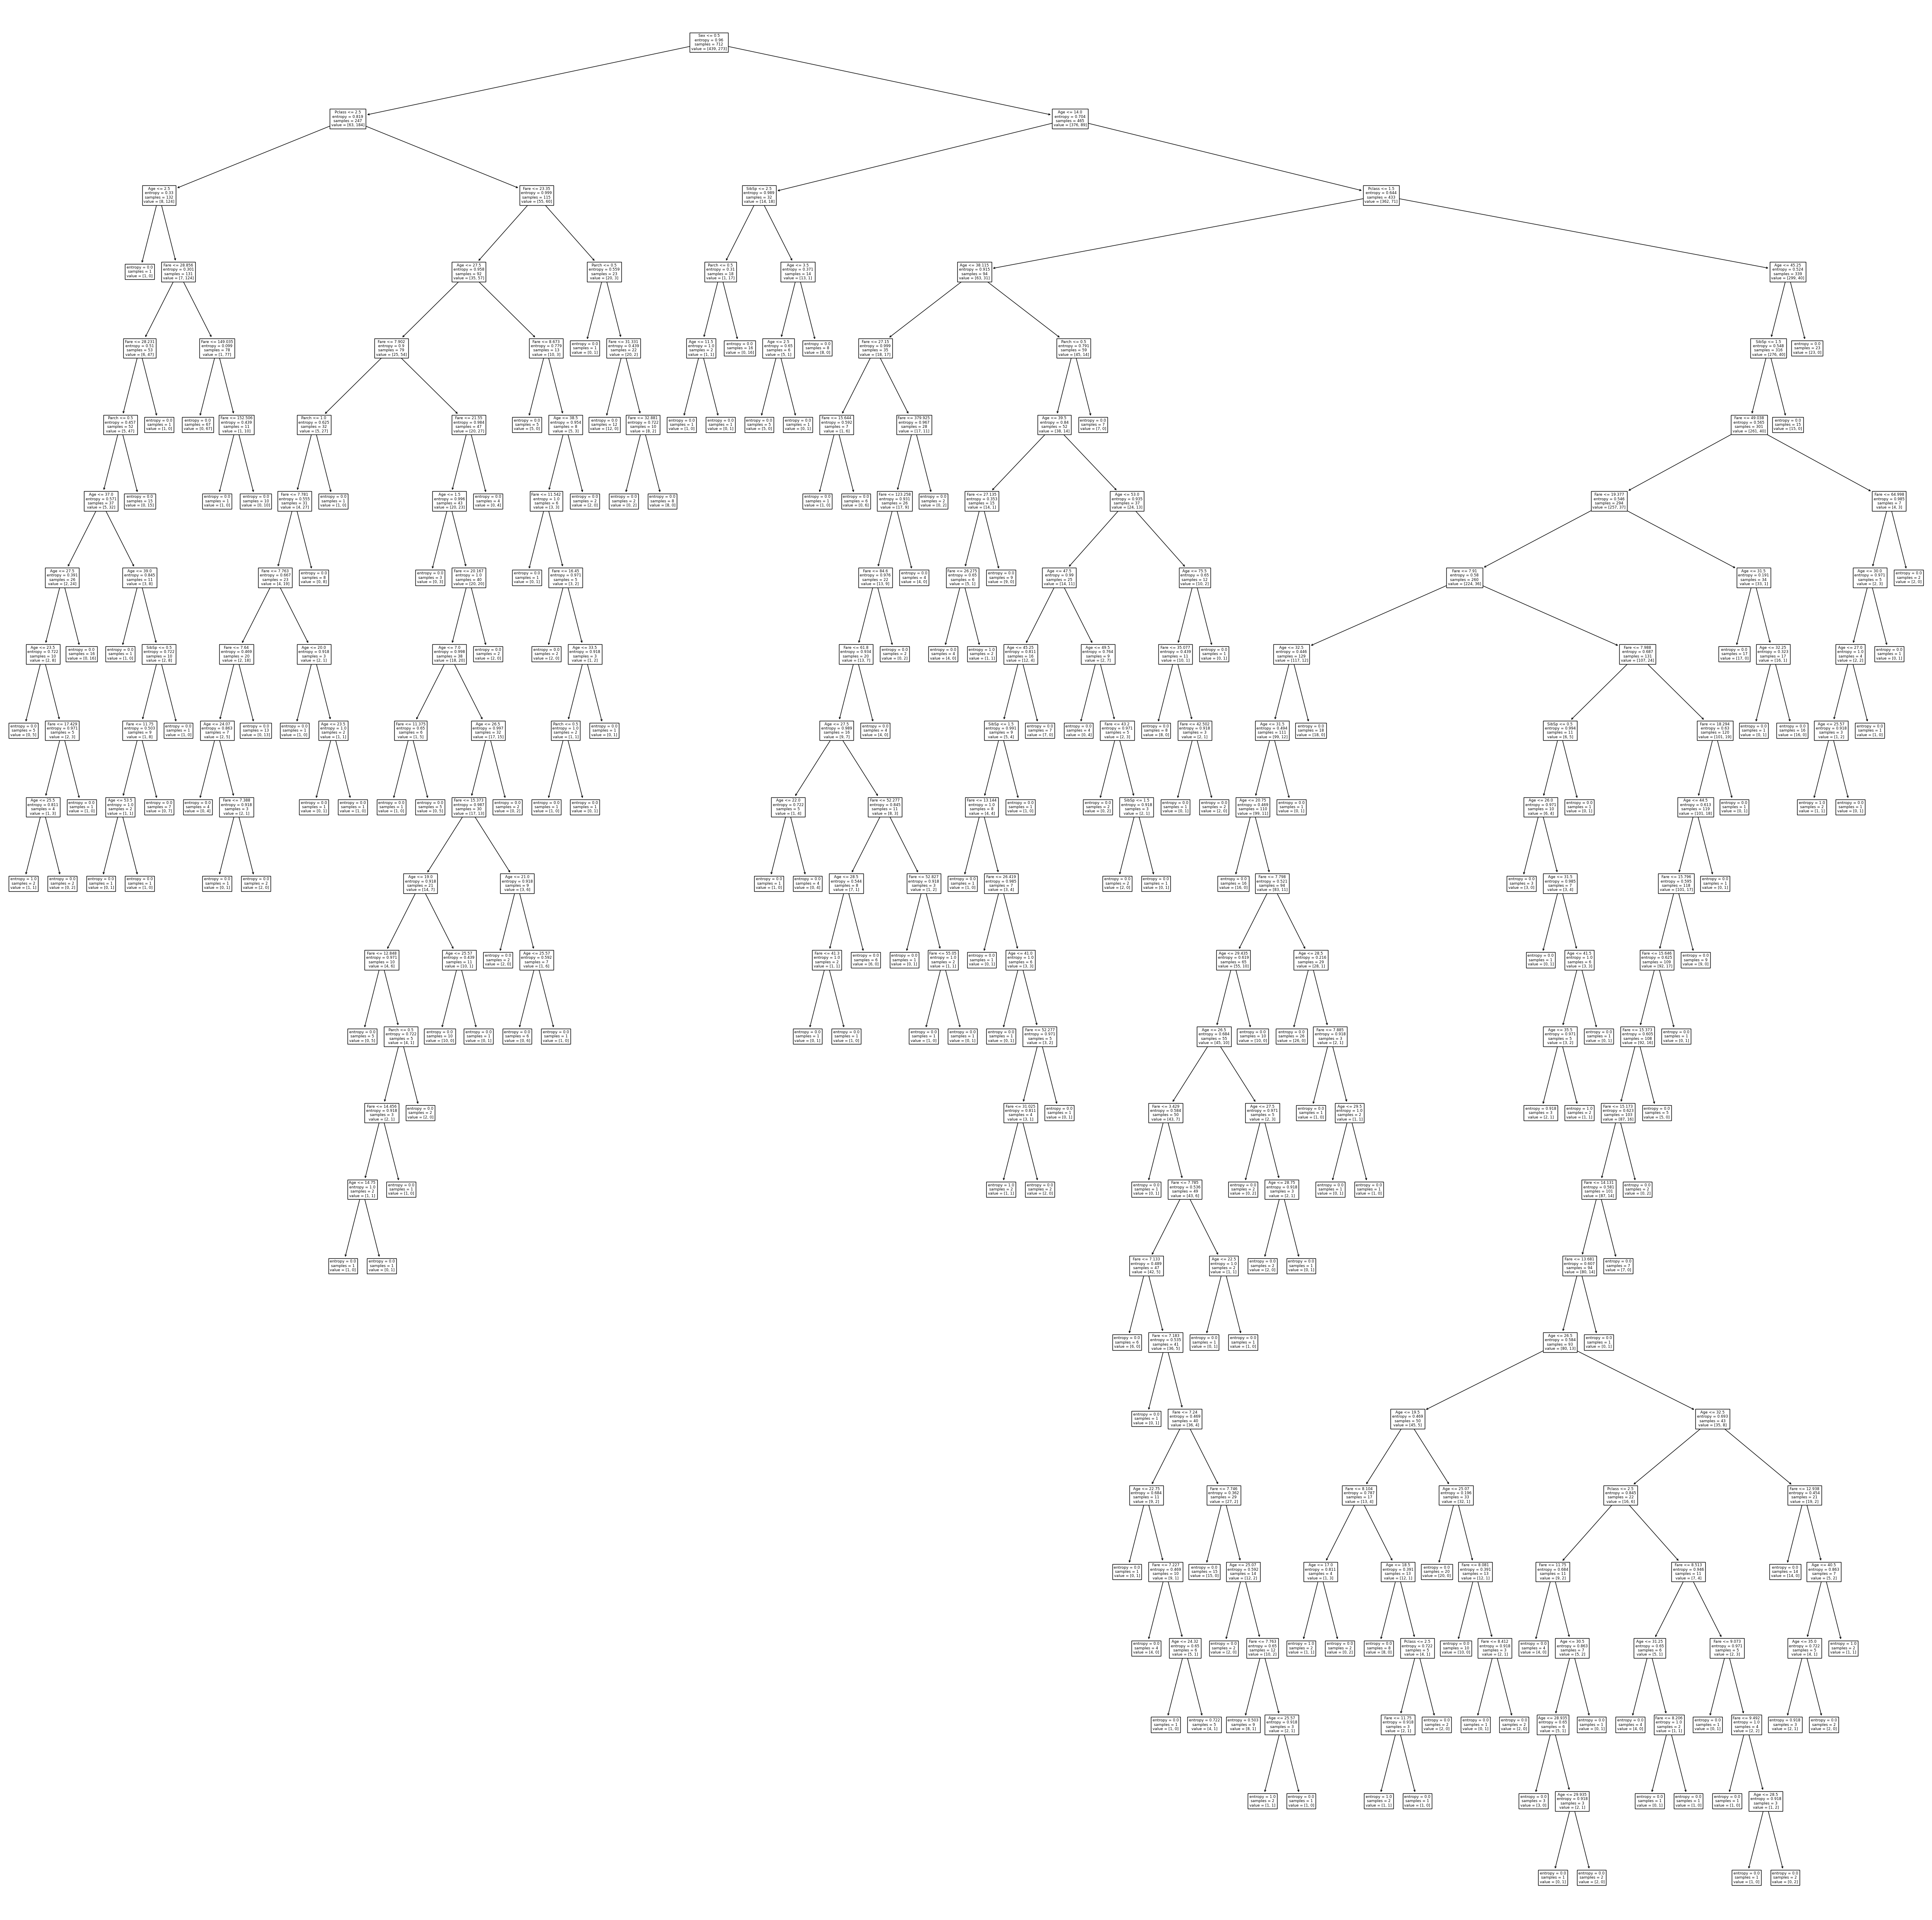

In [60]:
plt.figure(figsize=(60,60))
result1 = plot_tree(model1, feature_names=features) 

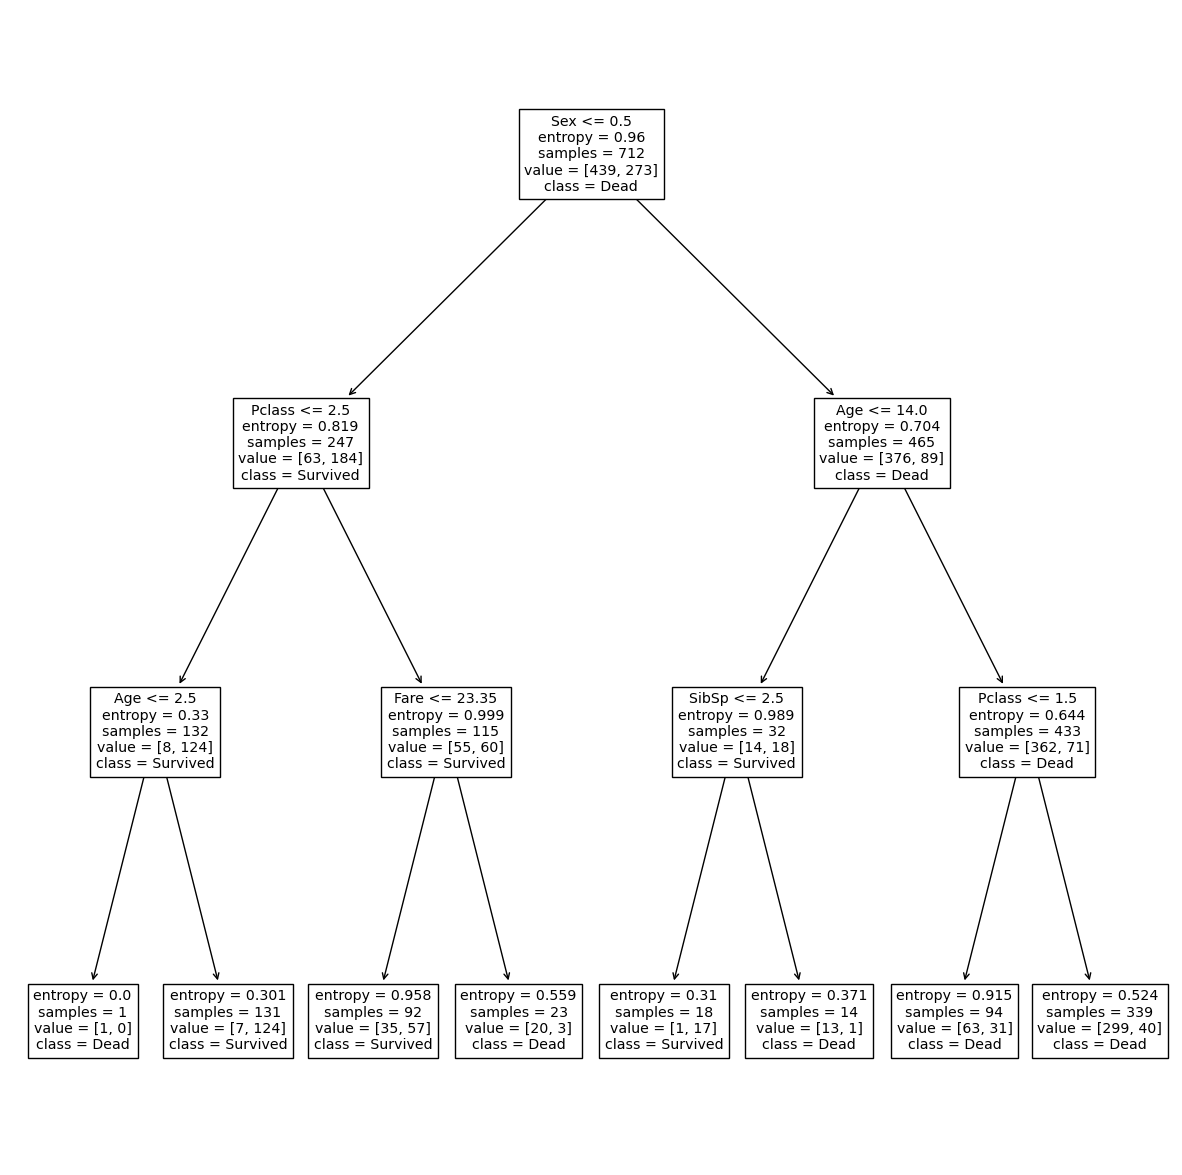

In [61]:
plt.figure(figsize=(15,15))
result1 = plot_tree(model2, feature_names=features, class_names=['Dead','Survived']) 